### 디렉토리 구조 확인 후 학습, 시험용 메타 정보를 dataframe으로 생성

In [75]:
%config Completer.use_jedi = False

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1743.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_262.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1524.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1336.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1461.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1797.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1499.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1170.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1259.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_422.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_636.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1395.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1800.jpg
/kaggle/input/plant-patholog

In [77]:
# test_df를 보면 알 수 있듯이 test 데이터의 식물 상태는 해당 competition의 정답에 해당하는 영역이라 안 알려준다.

train_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/train.csv')
test_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/test.csv')

print(train_df.shape, test_df.shape)
print(train_df.head(5))
print('---------------')
print(test_df.head(5))

(1821, 5) (1821, 1)
  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
---------------
  image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4


### tain_df를 통해 보면 healthy, multiple_diseases, rust, scab에 해당하는 영역들이 one hot encoding으로 되어있음
* 다만 모든 데이터가 one hot encoding 형식을 따르고 있는지는 검증이 필요

In [78]:
# 각 데이터 행의 합이 1이면 one hot encoding이 된 것이다.
train_df['sum'] = train_df['healthy'] + train_df['multiple_diseases'] + train_df['rust'] + train_df['scab']

# 각 행의 데이터 값이 1이 아닌 경우 출력해 one hot encoding 여부를 확인한다.
train_df[(train_df['sum'] > 1) | (train_df['sum'] == 0)]

Empty DataFrame
Columns: [image_id, healthy, multiple_diseases, rust, scab, sum]
Index: []

### 이미지의 절대 경로를 DataFrame에 추가하고 옆에 label 또한 추가

In [79]:
pd.set_option('max_colwidth', 100)

IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images/'
train_df['path'] = IMAGE_DIR + '/' + train_df['image_id'] + '.jpg'
train_df.head(10)

image_id  healthy  multiple_diseases  rust  scab  sum  \
0  Train_0        0                  0     0     1    1   
1  Train_1        0                  1     0     0    1   
2  Train_2        1                  0     0     0    1   
3  Train_3        0                  0     1     0    1   
4  Train_4        1                  0     0     0    1   
5  Train_5        1                  0     0     0    1   
6  Train_6        0                  1     0     0    1   
7  Train_7        0                  0     0     1    1   
8  Train_8        0                  0     0     1    1   
9  Train_9        1                  0     0     0    1   

                                                           path  
0  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_0.jpg  
1  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_1.jpg  
2  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_2.jpg  
3  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_3.jpg  
4  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_4.jpg  
5  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_5.jpg  
6  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_6.jpg  
7  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_7.jpg  
8  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_8.jpg  
9  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_9.jpg

In [80]:
def get_label(x):
    if x['healthy'] == 1:
        return 'healthy'
    elif x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    elif x['rust'] == 1:
        return 'rust'
    elif x['scab'] == 1:
        return 'scab'
    else:
        return None
    
train_df['label'] = train_df.apply(lambda x: get_label(x), axis=1)
train_df.head(5)

image_id  healthy  multiple_diseases  rust  scab  sum  \
0  Train_0        0                  0     0     1    1   
1  Train_1        0                  1     0     0    1   
2  Train_2        1                  0     0     0    1   
3  Train_3        0                  0     1     0    1   
4  Train_4        1                  0     0     0    1   

                                                           path  \
0  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_0.jpg   
1  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_1.jpg   
2  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_2.jpg   
3  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_3.jpg   
4  /kaggle/input/plant-pathology-2020-fgvc7/images//Train_4.jpg   

               label  
0               scab  
1  multiple_diseases  
2            healthy  
3               rust  
4            healthy

In [81]:
# 학습 이미지 건수 및 label 건수
print(train_df.shape)

# value_counts()를 보면 데이터별로 개수의 편차가 크다는 것을 알 수 있다
# 나중에 augmentation을 통한 조정 필요
train_df['label'].value_counts()

(1821, 8)


label
rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: count, dtype: int64

### 원본 이미지 시각화
* healthy multiple_diseases rust scab 순서로 정리
* 이미지 size는 (1365, 2048)

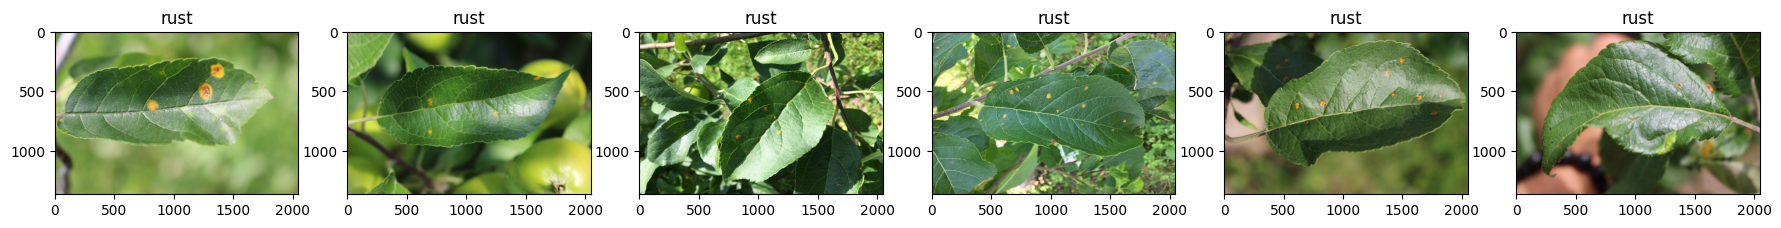

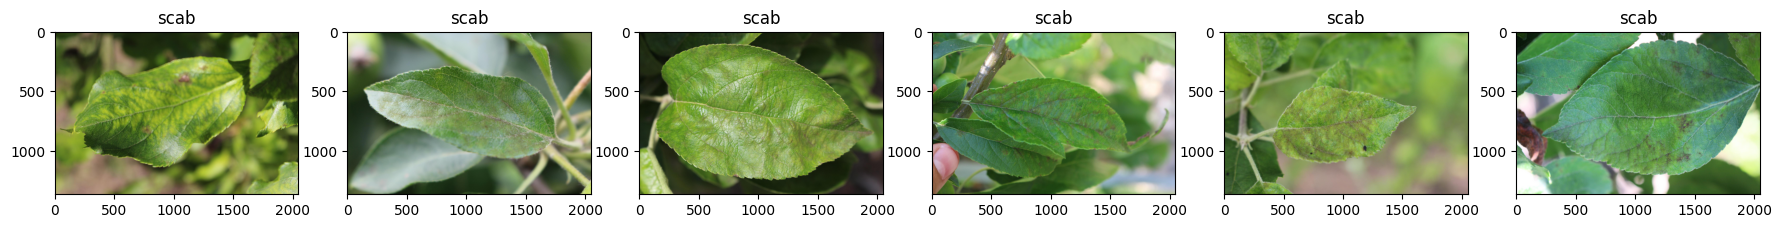

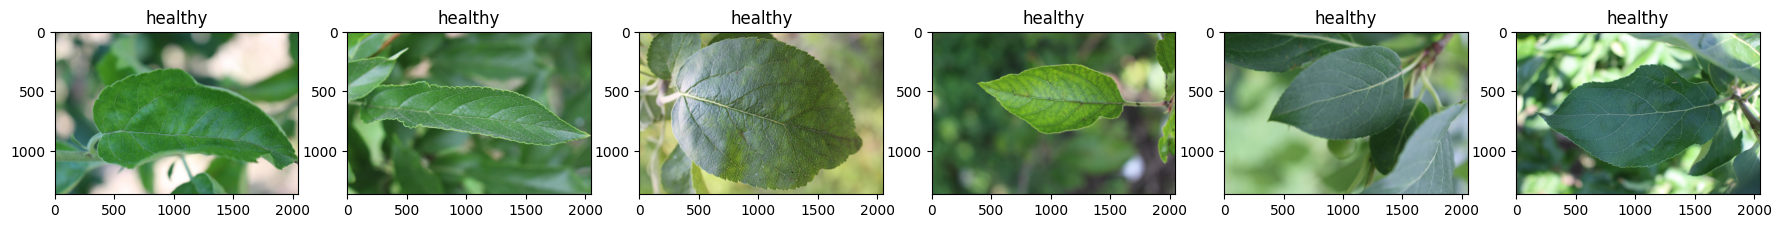

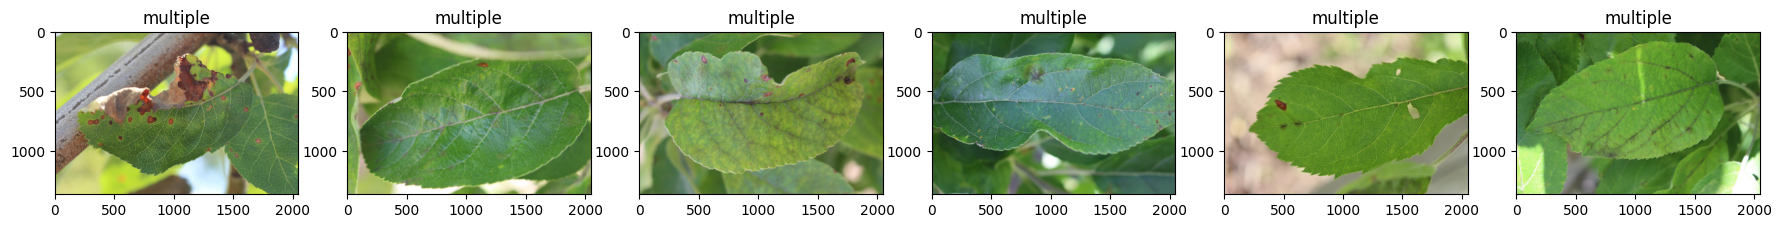

In [82]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_grid_images(image_path_list, augmentor=None, ncols=6, title=None):
    fig, axs = plt.subplots(figsize=(22,4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].set_title(title)

rust_image_list = train_df[train_df['label'] == 'rust']['path'].iloc[:6].tolist()
scab_image_list = train_df[train_df['label'] == 'scab']['path'].iloc[:6].tolist()
healthy_image_list = train_df[train_df['label'] == 'healthy']['path'].iloc[:6].tolist()
multiple_image_list = train_df[train_df['label'] == 'multiple_diseases']['path'].iloc[:6].tolist()

show_grid_images(rust_image_list, ncols=6, title='rust')
show_grid_images(scab_image_list, ncols=6, title='scab')
show_grid_images(healthy_image_list, ncols=6, title='healthy')
show_grid_images(multiple_image_list, ncols=6, title='multiple')

### 이미지 augmentation 적용

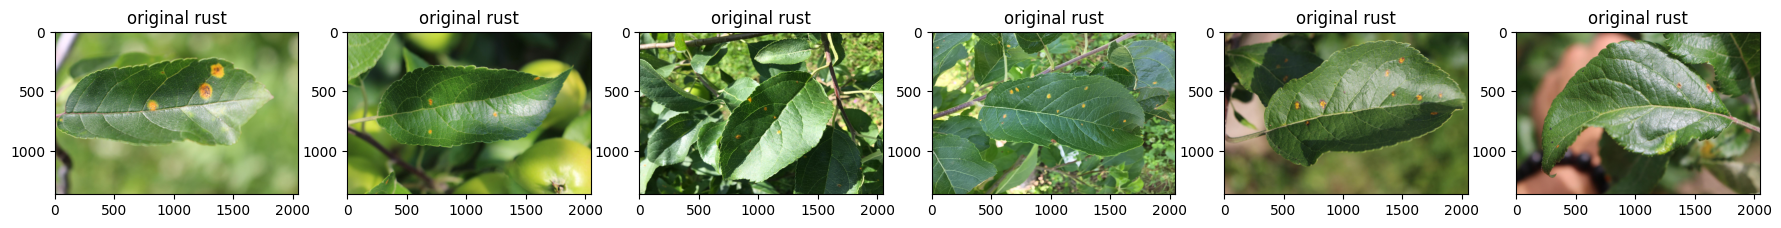

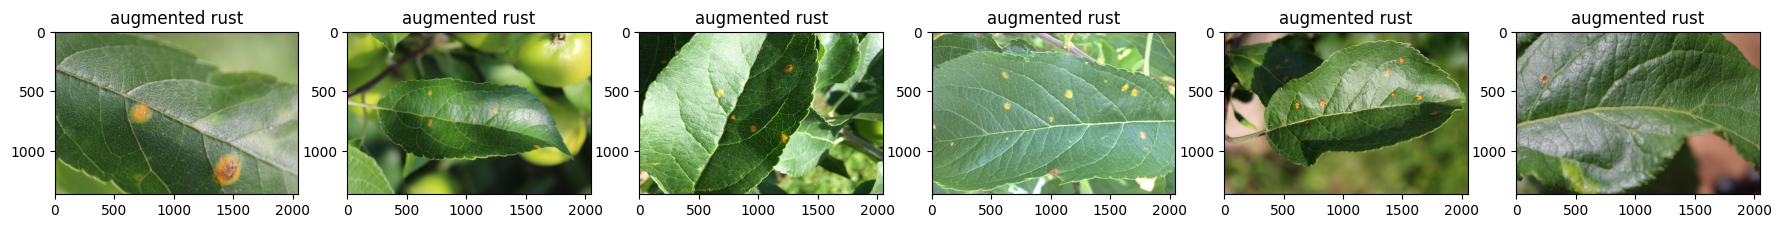

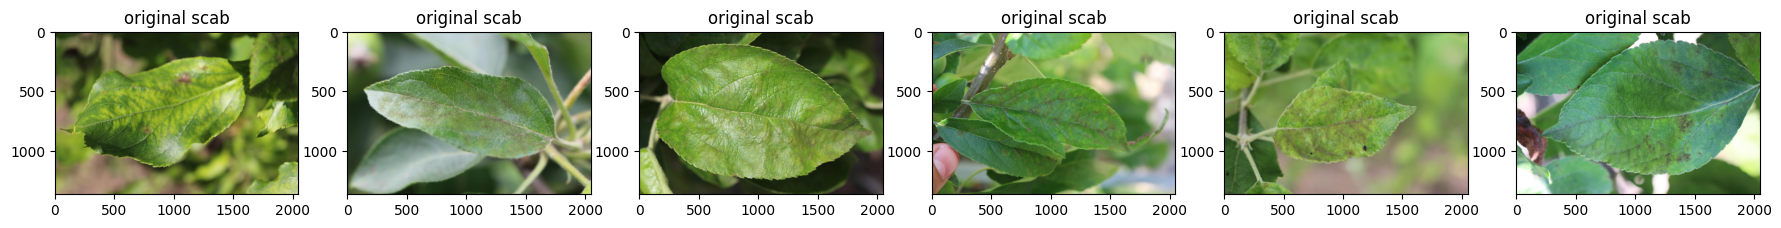

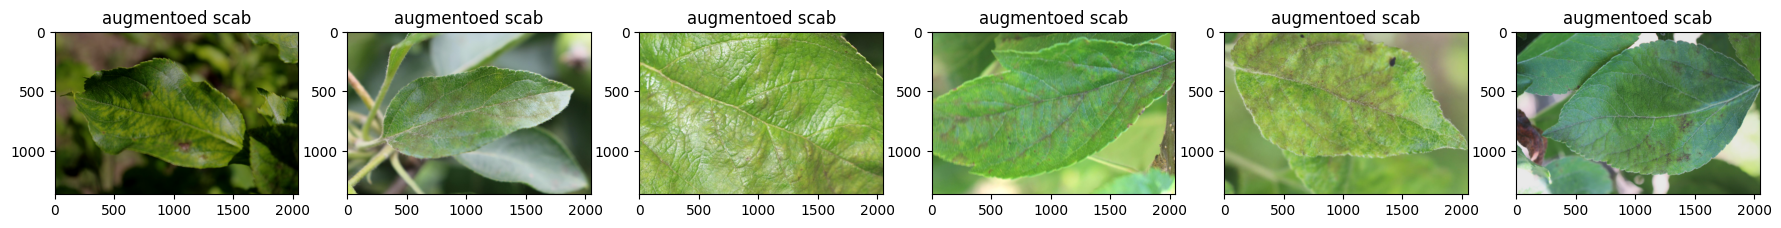

In [83]:
import albumentations as A

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7,0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2,0.2), contrast_limit=(-0.2,0.2), p=0.5),
    A.Blur(p=0.2)
])

show_grid_images(rust_image_list, ncols=6, title='original rust')
show_grid_images(rust_image_list, augmentor=augmentor_01, ncols=6, title='augmented rust')
show_grid_images(scab_image_list, ncols=6, title='original scab')
show_grid_images(scab_image_list, augmentor=augmentor_01, ncols=6, title='augmentoed scab')

### Sequence 기반의 dataset 생성
* image size를 유동적으로 정할 수 있게 해당 내용을 class 입력 parameter로 받는다.
* opencv의 resize()는 가로x세로의 이미지를 받는다. 하지만 보통의 이미지 배열의 경우 세로x가로에 해당하는 행x열로 이미지를 받으므로 이를 감안해야 한다.
* 캐글 대회를 위해 제출하는 테스트 데이터의 값은 label값이 없다. 따라서 이를 반영하는 장치가 필요하다.

In [84]:
from keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

class Plant_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=(224,224), batch_size=64,
                augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 섫명
        image_filenames: opencv 이미지 절대경로가 들어있는 리스트
        labels: image들의 label 값
        batch_size: __getitiem__(self, index) 호출 시 가져올 data batch 건수
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을 지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.shuffle = shuffle
        self.pre_func = pre_func
    
    # Sequence를 상속받은 dataset은 batch_size 단위로 입력된 데이터를 처리한다.
    # __len__(self)는 전체 데이터 건수가 주어졌을 때 batch_size 단위로 몇 번 데이터를 반환하는 지 나타낸다.
    def __len__(self):
        return int(np.ceil(len(self.image_filenames)/self.batch_size))
    
    def __getitem__(self, index):
        # index는 몇 번째 batch인지 나타낸다.
        # 아래 코드는 batch_size만큼 순차적으로 데이터를 갖고 오기 위한 작업이다.
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        # test_df의 경우 label 값이 없어 이를 반영하기 위한 장치이다.
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        else:
            label_batch = None
            
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size[0], self.image_size[1], 3), dtype='float32')
        
        # batch_size만큼 담긴 건수만큼 iteration하면서 opencv를 통해 이미지를 load -> augmentation 적용 -> image_batch에 넣기
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            # 원본 이미지와 다르게 resize를 적용한다. 여기서 cv2.resize의 사이즈 개념은 가로x세로 개념이지만 일반 배열은 세로x가로 개념이라 이에 유의한다.
            image = cv2.resize(image, (self.image_size[1], self.image_size[0]))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용해 scaling 적용
            if self.pre_func is not None:
                image = self.pre_func(image)
            
            image_batch[image_index] = image
            
        if self.labels is None:
            return image_batch
        else:
            return image_batch, label_batch
        
    # epoch가 한 번 수행이 완료될 때마다 모델의 fit()에서 호출
    def on_epoch_end(self):
        if self.shuffle:
            self.image_filenames, self.labels = shuffle(self.image_filenames, self.labels, random_state=42)
        else:
            pass
                

### 학습 데이터용 dataframe에서 학습용/검증용으로 이미지 절대 경로와 label을 추출하고 이를 Plant_Dataset에 넣어 Dataset 생성
* 이미 학습용 dataframe에 'healthy', 'multiple_diseases', 'rust', 'scab' 순으로 원핫 인코딩 되어 있어서 이 순서 그대로 유지
* 캐글에서도 테스트 데이터 예측 결과를 위 순서로 받으니까 순서를 섞거나 별도의 one hot encoding을 해선 안 된다
* augmentation은 위의 augmentor_01을 사용하고 pre_func는 xception용 preprocessing 함수 적용.

In [85]:
# 별도의 one hot encoding 없이 train, validation 데이터로 분할

from sklearn.model_selection import train_test_split

def get_train_valid(train_df, valid_size=0.2, random_state=42):
    train_path = train_df['path'].values 
    train_label = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    
    return tr_path, tr_label, val_path, val_label

In [86]:
# 실제 훈련용 데이터를 넣어서 분할
# image size는 224x224로 dataset 생성

from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

tr_path, tr_label, val_path, val_label = get_train_valid(train_df, valid_size=0.2, random_state=42)

print(tr_path.shape, tr_label.shape)
print(val_path.shape, val_label.shape)

tr_ds = Plant_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                      augmentor=augmentor_01, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                      augmentor=augmentor_01, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))

print(tr_image_batch.shape, tr_label_batch.shape)
print(val_image_batch.shape, val_label_batch.shape)

(1456,) (1456, 4)
(365,) (365, 4)
(64, 224, 224, 3) (64, 4)
(64, 224, 224, 3) (64, 4)


### create_model() 함수 생성

In [87]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout

from tensorflow.keras.applications import Xception, EfficientNetB0

def create_model(model_type='efficientnetb0', in_shape=(224,224,3), n_classes=4):
    input_tensor = Input(shape=in_shape)
    
    if model_type == 'efficientnetb0':
        base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(units=n_classes, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    return model

### Xcetion 모델을 생성하고 학습 수행
* image size는 224x224로 설정
* learning rate scheduler는 ReduceLROnPlateau이고, 초기 Learning Rate는 0.0001로 설정한다
* epochs는 10회만
* metrics는 ROC-AUC로 설정

In [88]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam

xcp_model_01 = create_model(model_type='xception', in_shape=(224,224,3))
xcp_model_01.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=[AUC()])

rlr_cb = ReduceLROnPlateau(monitoer='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

history = xcp_model_01.fit(tr_ds, batch_size=64, epochs=10, validation_data=val_ds, callbacks=[rlr_cb, ely_cb], verbose=1)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - auc_2: 0.7587 - loss: 1.1442 - val_auc_2: 0.8859 - val_loss: 0.8380 - learning_rate: 1.0000e-04
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - auc_2: 0.9504 - loss: 0.5373 - val_auc_2: 0.9538 - val_loss: 0.5712 - learning_rate: 1.0000e-04
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - auc_2: 0.9816 - loss: 0.3264 - val_auc_2: 0.9650 - val_loss: 0.4768 - learning_rate: 1.0000e-04
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - auc_2: 0.9892 - loss: 0.2395 - val_auc_2: 0.9772 - val_loss: 0.3506 - learning_rate: 1.0000e-04
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - auc_2: 0.9943 - loss: 0.1745 - val_auc_2: 0.9788 - val_loss: 0.3492 - learning_rate: 1.0000e-04
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - auc_2: 0.9953 - loss: 0.1587 - val_auc_2: 0.9753 - val_loss: 0.3935 - learning_rate: 1.0000e-04
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - auc_2: 0.9943 - loss: 0.1630 - val_auc_2: 0.9905 - val_loss: 0.2370 - 

### 테스트 데이터로 질병을 예측하고 Kaggle에 제출하기 위한 submit csv 파일을 만든다
* 테스트용 데이터를 통해 test_ds를 만들고, label은 없으니까 None으로 처리한다.

In [89]:
# 위와 같은 모습으로 제출해야 한다.

sample_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv')
sample_df.head(5)

image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25

In [90]:
# 테스트용 dataframe 생성

IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
test_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/test.csv')
test_df['path'] = IMAGE_DIR + '/' + test_df['image_id'] + '.jpg'

test_df.head(10)

image_id                                                        path
0   Test_0  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_0.jpg
1   Test_1  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_1.jpg
2   Test_2  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_2.jpg
3   Test_3  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_3.jpg
4   Test_4  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_4.jpg
5   Test_5  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_5.jpg
6   Test_6  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_6.jpg
7   Test_7  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_7.jpg
8   Test_8  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_8.jpg
9   Test_9  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_9.jpg

In [91]:
# 테스트용 dataset을 생성하고 이를 이용해 model의 predict()를 호출해 이미지 예축 수행

test_path = test_df['path'].values
# label은 None이다.
test_ds = Plant_Dataset(test_path, None, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                       augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

# predict로 예측
preds = xcp_model_01.predict(test_ds)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step


In [92]:
# 예측한 결과를 기반으로 제출용 dataframe을 만든다

pred_df = pd.DataFrame(preds)
pred_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
pred_df.head(5)

# 기존에 있던 테스트용 dataframe에 위의 예측 dataframe을 합쳐서 제출용 dataframe생성
submit_df = pd.concat([test_df['image_id'], pred_df], axis=1)
submit_df.head(5)

submit_df.to_csv('submit_01.csv', index=False)